In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [9]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
categories = data.target_names

In [11]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [15]:
print(len(test.data))

7532


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [21]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(66.453125, 0.5, 'Predicted label')

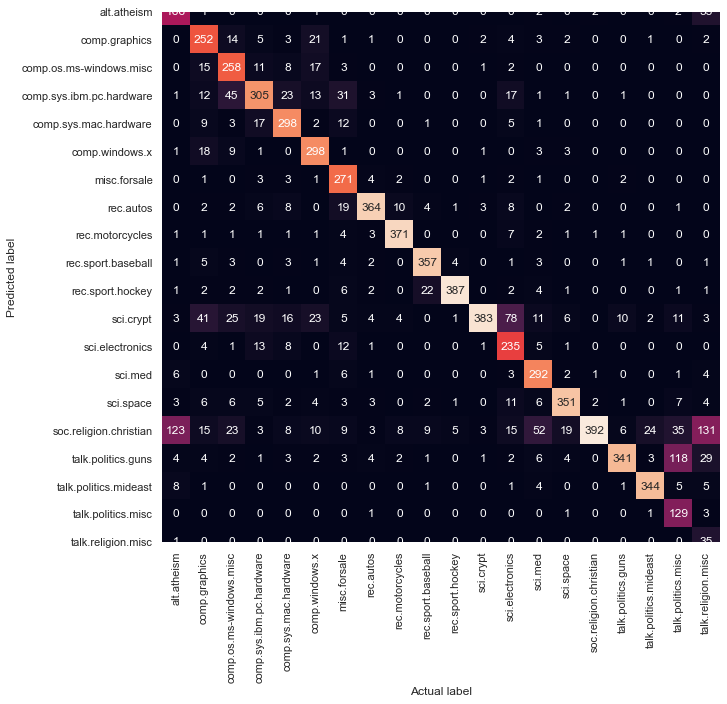

In [25]:
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, cbar=False, fmt='d', annot=True, 
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [27]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [34]:
predict_category('Husqvarna is fast')

'rec.autos'

In [39]:
predict_category('Hyundai is the best')

'rec.autos'

In [40]:
predict_category('President of the US')

'talk.politics.misc'